In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('startup_funding.csv')
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [5]:
def clean_str(x):
    return str(x).replace('\\xc2\\xa0', '').replace('\\\\xc2\\\\xa0', '')
li= df.columns
for i in li:
    df[i] = df[i].apply(clean_str)
df    

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,nan,nan,nan,Asia Pacific Internet Group,Private Equity,"45,00,000",nan
3040,3041,29/01/2015,Graphene,nan,nan,nan,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,nan,nan,nan,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",nan
3042,3043,30/01/2015,Simplotel,nan,nan,nan,MakeMyTrip,Private Equity,nan,"Strategic Funding, Minority stake"


In [6]:
import warnings
warnings.filterwarnings('ignore')
total = df.isnull().sum().sort_values(ascending=True)
percent = (df.isnull().sum()/df.isnull().count())*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sr No,0,0.0
Date dd/mm/yyyy,0,0.0
Startup Name,0,0.0
Industry Vertical,0,0.0
SubVertical,0,0.0
City Location,0,0.0
Investors Name,0,0.0
InvestmentnType,0,0.0
Amount in USD,0,0.0
Remarks,0,0.0


In [7]:
df['Remarks'].value_counts()
df.drop('Remarks' ,axis=1, inplace=True)

In [8]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,nan,nan,nan,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29/01/2015,Graphene,nan,nan,nan,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30/01/2015,Mad Street Den,nan,nan,nan,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30/01/2015,Simplotel,nan,nan,nan,MakeMyTrip,Private Equity,nan


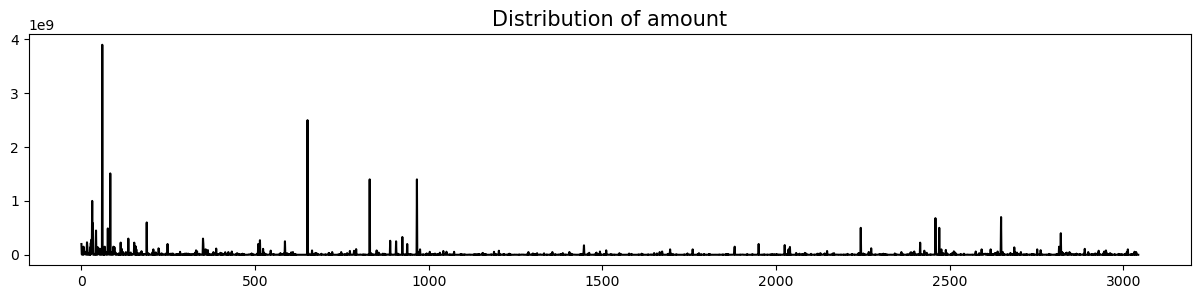

In [9]:
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']])
    x = str(x).replace(',', '').replace('+','')
    x = str(x).lower().replace('undisclosed', '').replace('n/a', '')
    if x == '':
        x = '-999'
    return float(x)

df['Amount in USD'] = df['Amount in USD'].apply(lambda x: float(clean_amount(x)))

plt.rcParams['figure.figsize'] = (15, 3)
df['Amount in USD'].plot(kind='line', color='black')
plt.title('Distribution of amount', fontsize=15)
plt.show()

In [10]:
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='12/05.2015'] = '12/05/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='13/04.2015'] = '13/04/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='15/01.2015'] = '15/01/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='22/01//2015'] = '22/01/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='05/072018'] = '05/07/2018'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='01/07/015'] = '01/07/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [11]:
df['year_month'] = (pd.to_datetime(df['Date dd/mm/yyyy'], format='%d%m%Y').dt.year*100) + (pd.to_datetime(df['Date dd/mm/yyyy'], format='%d%m%Y').dt.month)
df['year_month']

ValueError: time data '09/01/2020' does not match format '%d%m%Y' (match)

Top 10 funding periods
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


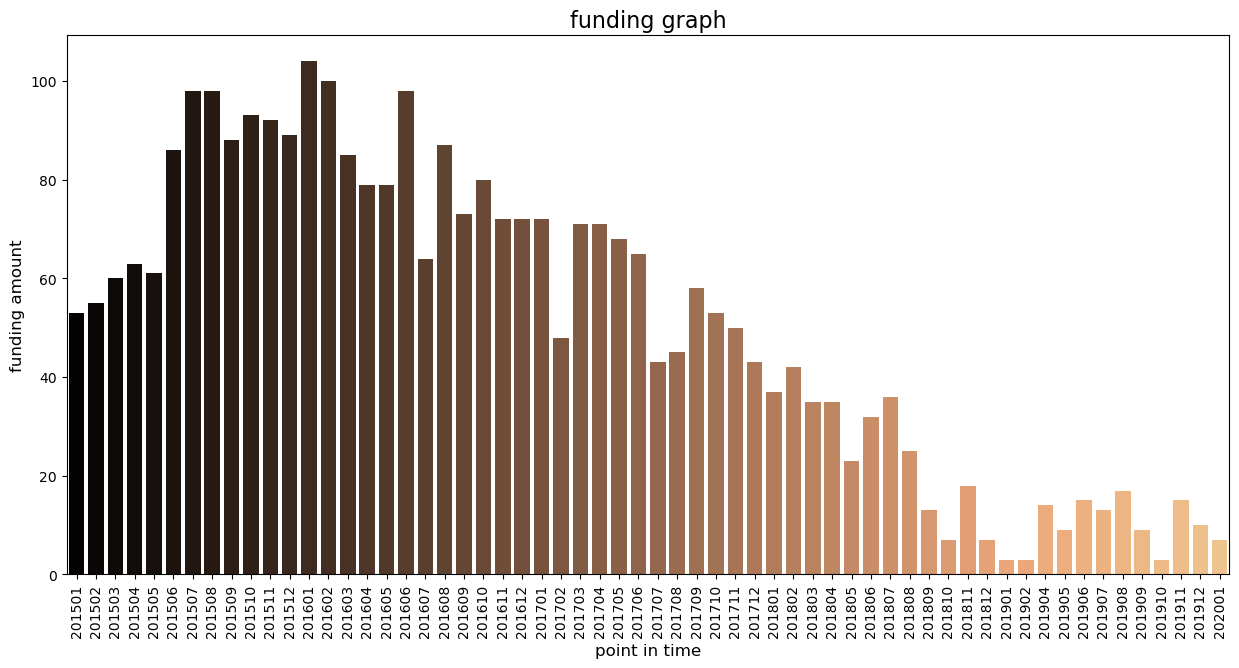

In [15]:
df["yearmonth"] = (pd.to_datetime(df['Date dd/mm/yyyy'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date dd/mm/yyyy'],format='%d/%m/%Y').dt.month)
print('Top 10 funding periods\n', df["yearmonth"].value_counts().sort_values(ascending=False).head(10))
year_month = df['yearmonth'].value_counts()
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x=year_month.index, y=year_month.values, palette='copper')
plt.xticks(rotation=90)
plt.xlabel('point in time', fontsize=12)
plt.ylabel('funding amount', fontsize=12)
plt.title('funding graph', fontsize=16)
plt.show()

In [16]:
print('Max one time funding:', df['Amount in USD'].dropna().sort_values(ascending=False).max())

Max one time funding: 3900000000.0


In [17]:
import ipywidgets
from ipywidgets import interact, interact_manual
@interact
def check(column='Amount in USD', x=500000000):
    return df[df[column]>x].sort_values(by='Amount in USD', ascending= False).head(10)

interactive(children=(Text(value='Amount in USD', description='column'), IntSlider(value=500000000, descriptio…

In [18]:
df[df['Startup Name']=='Paytm']

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [19]:
df[df['Amount in USD']>df['Amount in USD'].min()].tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
3038,3039,28/01/2015,Grabhouse.com,nan,nan,nan,"Kalaari Capital, Sequoia Capital",Private Equity,2500000.0,201501
3039,3040,29/01/2015,Printvenue,nan,nan,nan,Asia Pacific Internet Group,Private Equity,4500000.0,201501
3040,3041,29/01/2015,Graphene,nan,nan,nan,KARSEMVEN Fund,Private Equity,825000.0,201501
3041,3042,30/01/2015,Mad Street Den,nan,nan,nan,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,201501
3043,3044,31/01/2015,couponmachine.in,nan,nan,nan,UK based Group of Angel Investors,Seed Funding,140000.0,201501


In [20]:
df['Amount in USD'].min()

-999.0

In [21]:
df['Amount in USD'].sort_values()

2125   -9.990000e+02
1464   -9.990000e+02
708    -9.990000e+02
709    -9.990000e+02
710    -9.990000e+02
            ...     
966     1.400000e+09
830     1.400000e+09
83      1.510950e+09
651     2.500000e+09
60      3.900000e+09
Name: Amount in USD, Length: 3044, dtype: float64

In [22]:
df[df['Amount in USD']==-999].shape


(971, 10)

total no of startups: 2457
Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
NoBroker     6
Medinfi      6
Nykaa        6
Meesho       6
Jugnoo       5
Grofers      5
Name: Startup Name, dtype: int64


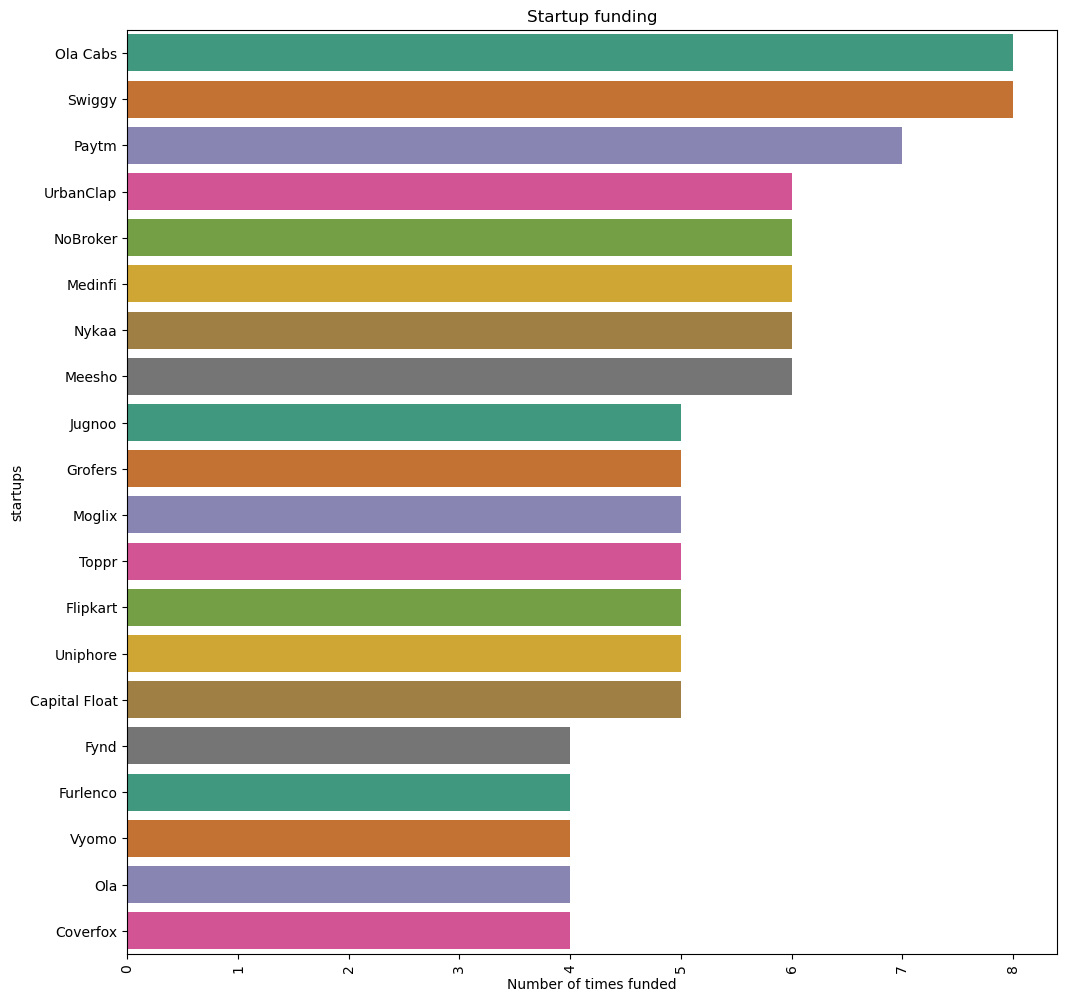

In [26]:
print('total no of startups:', len(df['Startup Name'].unique()))
print(df['Startup Name'].value_counts().head(10))
startup_20 = df['Startup Name'].value_counts().head(20)

#plot
plt.rcParams['figure.figsize'] = (12, 12)
sns.barplot(y=startup_20.index, x=startup_20.values, alpha=0.9, palette='Dark2')
plt.xticks(rotation = 90)
plt.xlabel('Number of times funded')
plt.ylabel('startups')
plt.title('Startup funding')
plt.show()

startups industry: Consumer Internet     941
Technology            478
eCommerce             186
Consumer servicing    171
Healthcare             70
Finance                62
ECommerce              61
Logistics              32
E-Commerce             29
Education              24
Name: Industry Vertical, dtype: int64


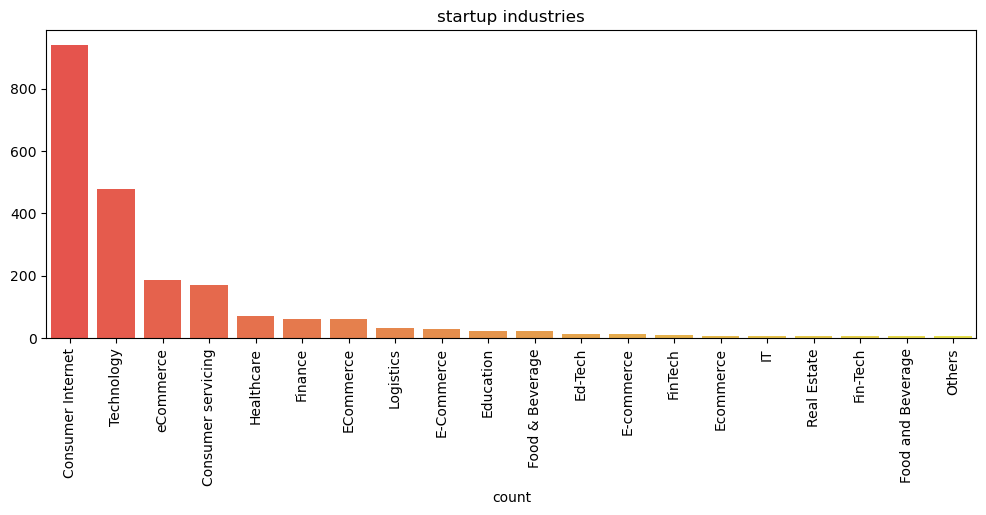

In [34]:
df['Industry Vertical'] = df['Industry Vertical'].replace('nan', 'Consumer servicing')
print('startups industry:', df['Industry Vertical'].value_counts().head(10))
industry = df['Industry Vertical'].value_counts().head(20)

#plot
plt.rcParams['figure.figsize'] = (12, 4)
sns.barplot(x=industry.index, y=industry.values, alpha=0.8, palette= 'autumn')
plt.xticks(rotation= 'vertical')
plt.xlabel('industry')
plt.xlabel('count')
plt.title('startup industries')
plt.show()

startups product sub-vertical: nan                                              936
Online Lending Platform                           11
Online Pharmacy                                   10
Food Delivery Platform                             8
Online Learning Platform                           5
Online Education Platform                          5
Online Lending                                     5
Online lending platform                            5
Education                                          5
Online Food Delivery                               4
Non-Banking Financial Company                      4
Online Gifting platform                            3
B2B Marketplace                                    3
Online learning platform                           3
Online platform for Higher Education Services      3
Online Payment Gateway                             3
Online Furniture Store                             3
Online Insurance Aggregator                        3
Online Insuranc

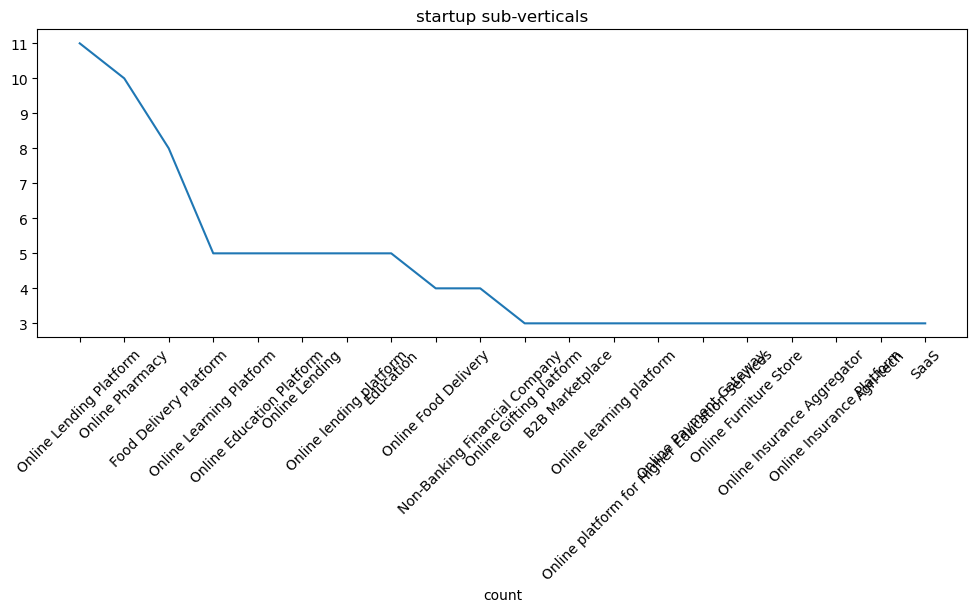

In [43]:

print('startups product sub-vertical:', df['SubVertical'].value_counts().head(20))
subvertical = df['SubVertical'].value_counts()[1:].head(20)

#plot
plt.rcParams['figure.figsize'] = (12, 4)
sns.lineplot(x=subvertical.index, y=subvertical.values, alpha=1, palette= 'winter')
plt.xticks(rotation= 45)
plt.xlabel('sub-vertical')
plt.xlabel('count')
plt.title('startup sub-verticals')
plt.show()

Bengaluru     1022
Mumbai         568
New Delhi      424
Gurgaon        291
Pune           105
Hyderabad       99
Chennai         97
Noida           93
Gurugram        50
Ahmedabad       38
Delhi           34
Jaipur          30
Kolkata         21
Indore          13
Chandigarh      11
Vadodara        10
Goa             10
Singapore        8
Coimbatore       5
Pune / US        4
Name: City  Location, dtype: int64


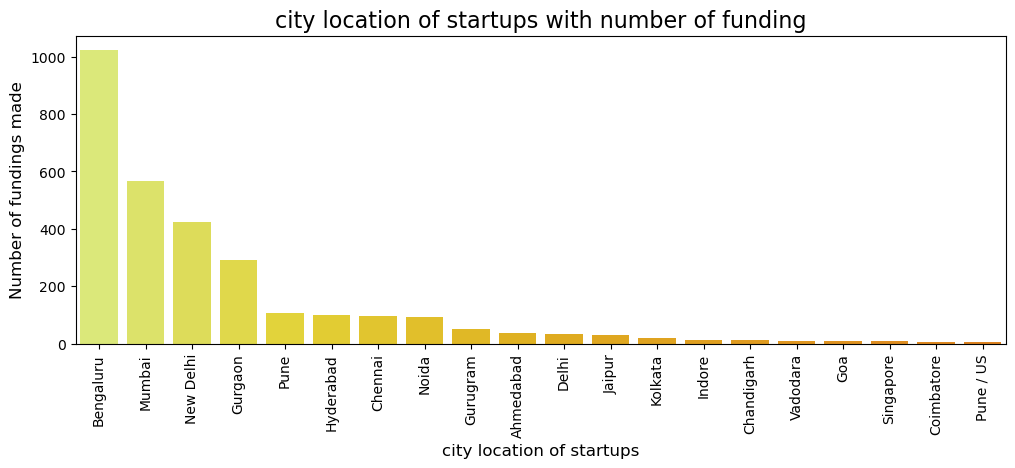

In [60]:
df['City  Location'] = df['City  Location'].replace('Bangalore', 'Bengaluru').replace('nan', 'Bengaluru')
city = df['City  Location'].value_counts().head(20)
print(city)

#plot
sns.barplot(x=city.index, y=city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

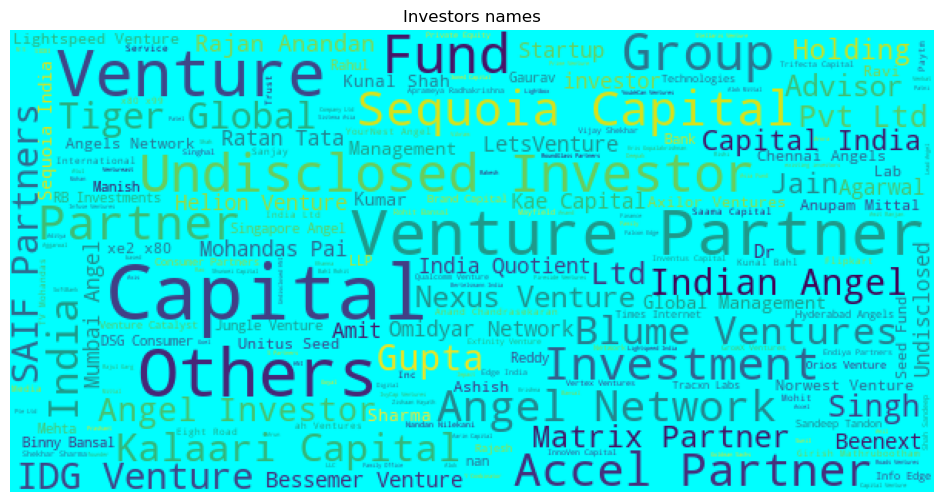

In [71]:
from wordcloud import WordCloud

names = df['Investors Name'][~pd.isnull(df['Investors Name'])]

wordclod = WordCloud(max_font_size = 50, height=300, width=600, background_color ='cyan').generate(' '.join(names))
plt.figure(figsize=(12, 6))
plt.imshow(wordclod)
plt.axis('off')
plt.title('Investors names')
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: Investors Name, dtype: int64


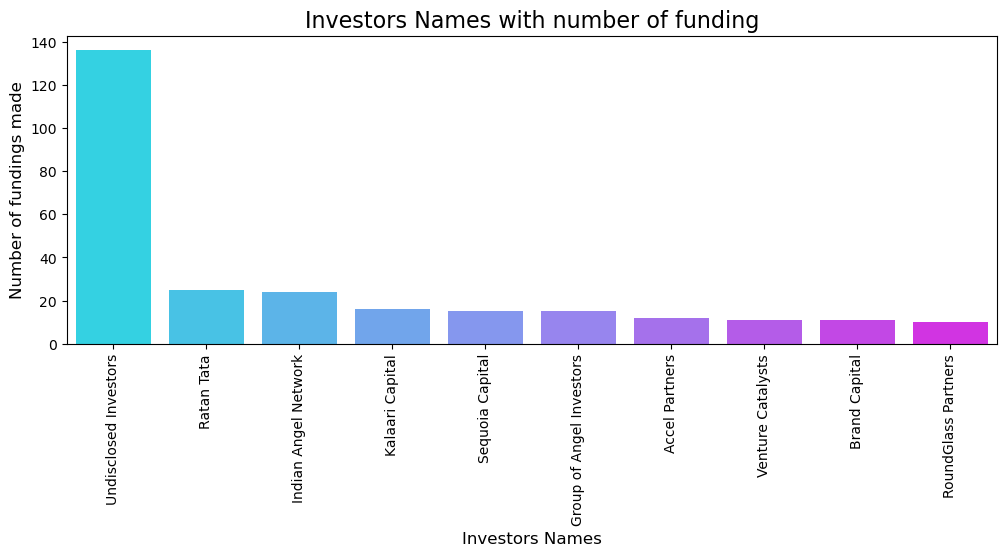

In [73]:
# lets analyze the investors on startups

# lets clean the dataset
df['Investors Name'][df['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = df['Investors Name'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(x=investors.index, y=investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentnType, dtype: int64


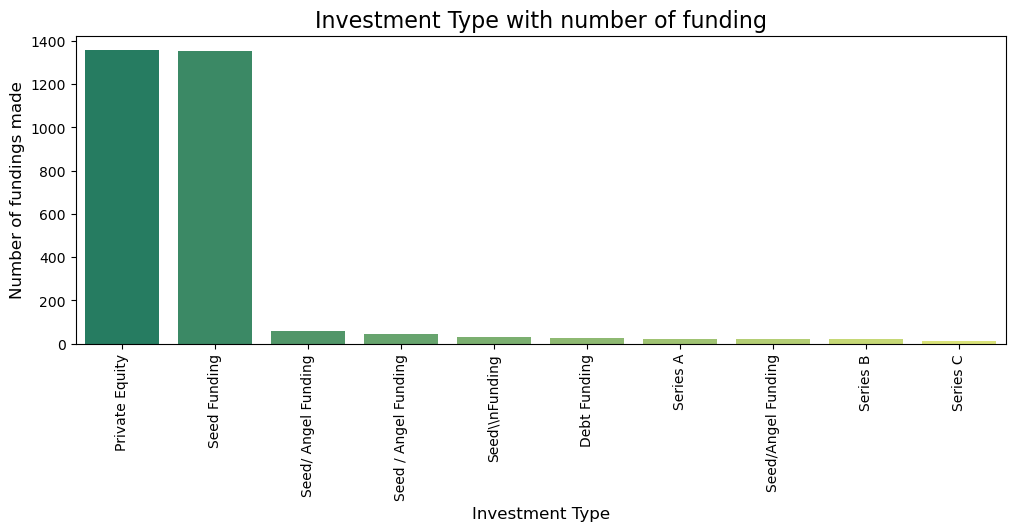

In [75]:
# lets analyze the investment
investment = df['InvestmentnType'].value_counts().head(10)
print(investment)

# lets clean the dataset
df['InvestmentnType'][df['InvestmentnType'] == 'SeedFunding'] = 'Seed Funding'
df['InvestmentnType'][df['InvestmentnType'] == 'Crowd funding'] = 'Crowd Funding'
df['InvestmentnType'][df['InvestmentnType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(x=investment.index, y=investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()